### WGU D208 Predictive Modeling
# Task 1 - Linear Regression

#### Ednalyn C. De Dios
#### August 6, 2023

## A1. Research Question

> ### _Can we predict how much the customer will pay in monthly charges?_

## A2. Goals

The organization will benefit from knowing how much a customer might pay in monthly charges. This will inform the decisions of stakeholders in matters where customer lifetime value needs to be taken into account. For example, a marketing campaign might target customers who are not spending enough money to be upsold with other telecom services.

## B1. Summary of Assumptions

According to Statology.org, assumptions of a multiple linear regression model include the following:
- A linear relationship between the independent and dependent variables
- The independent variables do not have multicollinearity
- Independence of observations
- Residuals have a constant variance at every point in the linear model (homoscedasticity)
- The residuals of the model are normally distributed

## B2. Tool Benefits

Jupyter Notebooks and the Python programming language will be used in this analysis. I chose to program in Python because it is very readable. It ranks among the most popular languages worldwide because it's powerful, flexible, and easy to use. (Geeksforgeeks.org, 2023)  Moreover, the Python community is active (Geeksforgeeks.org, 2023) and the language sports a vast system of mature packages for data science and machine learning. 

## B3. Appropriate Technique

The target variable, MonthlyCharge, is a continuous variable and hence multiple linear regression is the right tool to analyze if we can predict howw much a customer will pay in monthly charges. In addition, the data set has several good candidates of explanatory variables that will inform our predictions. We will determine if the independent variables have a positive or negative relationship to the target variable. This can perhaps affect the organization's decisions on marketing segmentation.

## C1. Data Cleaning

Our goal for cleaning the data set is to have a dataframe free of duplicates, missing values, outliers, and irrelevant variables. To do so, we will execute the following goals and steps:

1. Find and remove duplicates.
2. Handle missing values.
3. Remove outliers where necessary.
4. Drop irrelevant features.

In [1]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# for modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import r2_score

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# read the csv file
df = pd.read_csv('churn_clean.csv')

#### _Find and remove duplicates_

In [3]:
# select rows that are duplicated based on all columns. Any records after the first is considered a duplicate and can be dropped
dup = df[df.duplicated()]

# find out how many rows are duplicated
dup.shape

(0, 50)

#### _Handle missing values_

In [4]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CaseOrder,0,0.00,0,0.0,0,0.0
Customer_id,0,0.00,0,0.0,0,0.0
Interaction,0,0.00,0,0.0,0,0.0
UID,0,0.00,0,0.0,0,0.0
City,0,0.00,0,0.0,0,0.0
State,0,0.00,0,0.0,0,0.0
County,0,0.00,0,0.0,0,0.0
Zip,0,0.00,0,0.0,0,0.0
Lat,0,0.00,0,0.0,0,0.0
Lng,0,0.00,0,0.0,0,0.0


In [5]:
# count of values in the column
df['InternetService'].value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [6]:
# fill missing values with None as in no service
df = df.fillna("None")

df['InternetService'].value_counts()
show_missing(df)

InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CaseOrder,0,0.0,0,0.0,0,0.0
Customer_id,0,0.0,0,0.0,0,0.0
Interaction,0,0.0,0,0.0,0,0.0
UID,0,0.0,0,0.0,0,0.0
City,0,0.0,0,0.0,0,0.0
State,0,0.0,0,0.0,0,0.0
County,0,0.0,0,0.0,0,0.0
Zip,0,0.0,0,0.0,0,0.0
Lat,0,0.0,0,0.0,0,0.0
Lng,0,0.0,0,0.0,0,0.0


#### Remove outliers where necessary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### _Remove outliers_

{'whiskers': [<matplotlib.lines.Line2D at 0x29d06f16f10>,
 'caps': [<matplotlib.lines.Line2D at 0x29d06f35490>,
 'boxes': [<matplotlib.lines.Line2D at 0x29d06f07bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x29d06f359d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29d06f35c70>],
 'means': []}

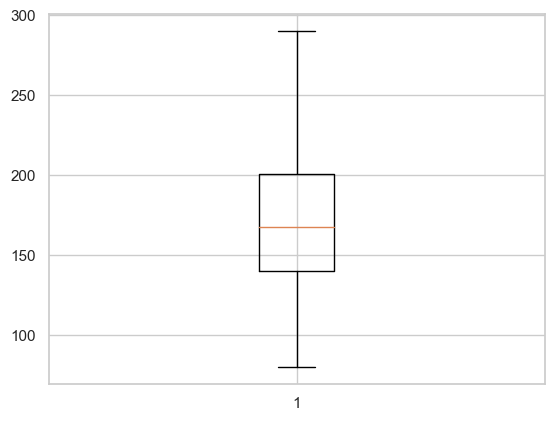

<Figure size 1000x700 with 0 Axes>

In [8]:
# visualize the distribution of column values
plt.boxplot(df['MonthlyCharge'])
fig = plt.figure(figsize =(10, 7))

#### _Drop irrelevant features_

In [9]:
# drop columns
df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County',
                 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
                 'Churn', 'Income', 'PaperlessBilling', 'PaymentMethod',
                 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
                 'Item6', 'Item7', 'Item8'], inplace=True)

## C2. Summary Statistics

In [10]:
df.describe()

,Children,Age,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


## C3. Visualizations

In [11]:
df.columns

Index(['Children', 'Age', 'Marital', 'Gender', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outage_sec_perweek'}>],
       [<Axes: title={'center': 'Email'}>,
        <Axes: title={'center': 'Contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'MonthlyCharge'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>]], dtype=object)

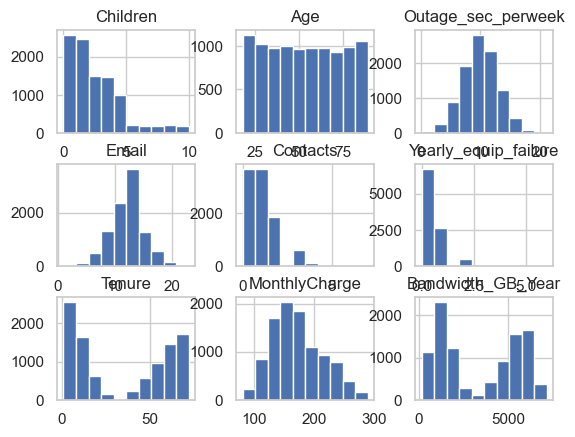

In [12]:
# make historgrams and save the plot
df[['Children',
    'Age',
    'Outage_sec_perweek',
    'Email',
    'Contacts',
    'Yearly_equip_failure',
    'Tenure',
    'MonthlyCharge',
    'Bandwidth_GB_Year'
   ]].hist()
plt.savefig('churn_univariate_hist.jpg')

In [13]:
df.columns

Index(['Children', 'Age', 'Marital', 'Gender', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

<Figure size 1000x1000 with 0 Axes>

[Text(0, 0, 'Fiber Optic'), Text(1, 0, 'DSL'), Text(2, 0, 'None')]

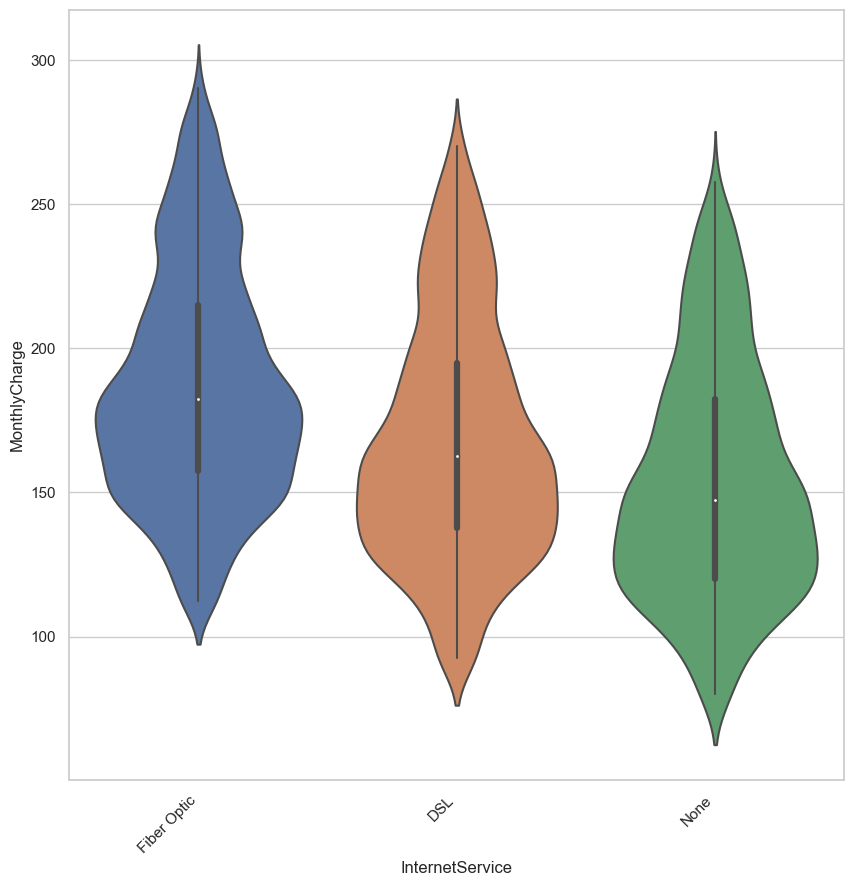

In [14]:
# make violin plot and save
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="InternetService", y="MonthlyCharge", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('churn_bivariate_internetservice.jpg')

<Figure size 1000x1000 with 0 Axes>

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

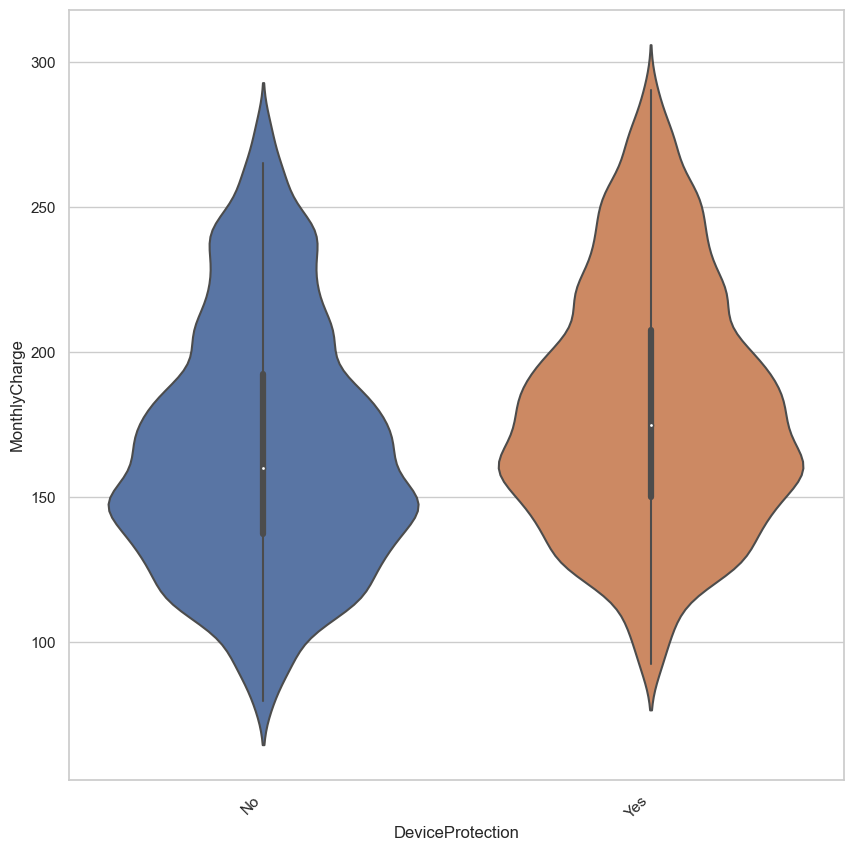

In [15]:
# make violin plot and save
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="DeviceProtection", y="MonthlyCharge", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('churn_bivariate_deviceprotection.jpg')

## C4. Data Transformation

In [16]:
df.columns

Index(['Children', 'Age', 'Marital', 'Gender', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [17]:
# assemble list of categorical columns to generate dummy variables for
dummy_columns = ['Marital',
                 'Gender',
                 'Techie',
                 'Contract',
                 'Port_modem',
                 'Tablet',
                 'InternetService',
                 'Phone',
                 'Multiple',
                 'OnlineSecurity',
                 'OnlineBackup',
                 'DeviceProtection',
                 'TechSupport',
                 'StreamingTV',
                 'StreamingMovies'
                ]

In [18]:
def dummify(df, column):
    """
    Takes a dataframe and column to return a dataframe with 
    dummy variables appended.
    """
    dummy = pd.get_dummies(df[column], prefix=column, prefix_sep='_',)
    return pd.concat([df, dummy], axis=1)

In [19]:
dummified = df.copy()

# loop through all the columns tp generate dummy for
for col in dummy_columns:
    dummified = dummify(dummified, col)

In [20]:
dummified.head()

,Children,Age,Marital,Gender,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,68,Widowed,Male,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,6.795513,172.455519,904.536110,False,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,True,False,True,False,True,False,False,True
1,1,27,Married,Female,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,1.156681,242.632554,800.982766,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False,True,False,True,True,False,True,False,True,False,False,True,False,True
2,4,50,Widowed,Female,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,15.754144,159.947583,2054.706961,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True
3,1,48,Married,Male,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,17.087227,119.956840,2164.579412,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True,False
4,0,83,Separated,Male,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,1.670972,149.948316,271.493436,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False


In [21]:
# drop original columns we generated dummies for
dummified.drop(columns=dummy_columns, inplace=True)
dummified.head()

,Children,Age,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,68,7.978323,10,0,1,6.795513,172.455519,904.536110,False,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,True,False,True,False,True,False,False,True
1,1,27,11.699080,12,0,1,1.156681,242.632554,800.982766,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False,True,False,True,True,False,True,False,True,False,False,True,False,True
2,4,50,10.752800,9,0,1,15.754144,159.947583,2054.706961,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True
3,1,48,14.913540,15,2,0,17.087227,119.956840,2164.579412,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True,False
4,0,83,8.147417,16,2,1,1.670972,149.948316,271.493436,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False


In [22]:
dummified.columns

Index(['Children', 'Age', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
       'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male',
       'Gender_Nonbinary', 'Techie_No', 'Techie_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year',
       'Port_modem_No', 'Port_modem_Yes', 'Tablet_No', 'Tablet_Yes',
       'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes'],
      dtype='object')

In [23]:
# move target variable at the end of the dataframe
df = dummified[['Children', 'Age', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year',
       'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
       'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male',
       'Gender_Nonbinary', 'Techie_No', 'Techie_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year',
       'Port_modem_No', 'Port_modem_Yes', 'Tablet_No', 'Tablet_Yes',
       'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'MonthlyCharge']]

In [24]:
df.head()

,Children,Age,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MonthlyCharge
0,0,68,7.978323,10,0,1,6.795513,904.536110,False,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,True,False,True,False,True,False,False,True,172.455519
1,1,27,11.699080,12,0,1,1.156681,800.982766,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False,True,False,True,True,False,True,False,True,False,False,True,False,True,242.632554
2,4,50,10.752800,9,0,1,15.754144,2054.706961,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,159.947583
3,1,48,14.913540,15,2,0,17.087227,2164.579412,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True,False,119.956840
4,0,83,8.147417,16,2,1,1.670972,271.493436,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,149.948316


In [25]:
# replace True with 1's and False with 0's
df = df.replace(True, 1)
df = df.replace(False, 0)

df.head()

,Children,Age,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MonthlyCharge
0,0,68,7.978323,10,0,1,6.795513,904.536110,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,172.455519
1,1,27,11.699080,12,0,1,1.156681,800.982766,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,242.632554
2,4,50,10.752800,9,0,1,15.754144,2054.706961,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,159.947583
3,1,48,14.913540,15,2,0,17.087227,2164.579412,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,119.956840
4,0,83,8.147417,16,2,1,1.670972,271.493436,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,149.948316


In [26]:
df.to_csv('churn_prepared.csv', index=False)

## C5. Prepared Data Set

Filename: churn_prepared.csv

## D1. Initial Model

In [27]:
scaler = MinMaxScaler()

# apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Children', 'Age', 'Outage_sec_perweek', 'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year', 'MonthlyCharge']
df[num_vars] = scaler.fit_transform(df[num_vars])

df.head()

,Children,Age,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,MonthlyCharge
0,0.0,0.704225,0.373260,0.409091,0.000000,0.166667,0.081624,0.106951,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0.439985
1,0.1,0.126761,0.549537,0.500000,0.000000,0.166667,0.002203,0.092165,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0.773872
2,0.4,0.450704,0.504705,0.363636,0.000000,0.166667,0.207804,0.271180,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0.380474
3,0.1,0.422535,0.701827,0.636364,0.285714,0.000000,0.226580,0.286868,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0.190207
4,0.0,0.915493,0.381271,0.681818,0.285714,0.166667,0.009447,0.016561,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0.332900


In [28]:
# split the dataframe between independent and dependent variables
X = df.drop('MonthlyCharge',axis= 1)
y = df[['MonthlyCharge']]

X.head()
y.head()

,Children,Age,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0.0,0.704225,0.373260,0.409091,0.000000,0.166667,0.081624,0.106951,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1
1,0.1,0.126761,0.549537,0.500000,0.000000,0.166667,0.002203,0.092165,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1
2,0.4,0.450704,0.504705,0.363636,0.000000,0.166667,0.207804,0.271180,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1
3,0.1,0.422535,0.701827,0.636364,0.285714,0.000000,0.226580,0.286868,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0
4,0.0,0.915493,0.381271,0.681818,0.285714,0.166667,0.009447,0.016561,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0


,MonthlyCharge
0,0.439985
1,0.773872
2,0.380474
3,0.190207
4,0.332900


In [29]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=493)

In [30]:
# build linear model

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyCharge   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.269e+04
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:48:02   Log-Likelihood:                 20069.
No. Observations:                7000   AIC:                        -4.008e+04
Df Residuals:                    6970   BIC:                        -3.987e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        5.587e+09   4.11e+09      1.360      0.174   -2.47e+09    1.36e+10
Children                       -0.4534      0.002   -221.589      0.000      -0.457      -0.449
Age                             0.3433      0.002    223.786      0.000       0.340       0.346
Outage_sec_perweek           5.317e-05      0.001      0.045      0.964      -0.002       0.002
Email                       -1.171e-05      0.001     -0.010      0.992      -0.002       0.002
Contacts                       -0.0016      0.001     -1.335      0.182      -0.004       0.001
Yearly_equip_failure           -0.0009      0.002     -0.576      0.564      -0.004       0.002
Tenure                         -8.5825      0.036   -239.267      0.000      -8.653      -8.512
Bandwidth_GB_Year              10.3326      0.043    239.278      0.000      10.248      10.417
Marital_Divorced             -8.35e+08   6.14e+08     -1.360      0.174   -2.04e+09    3.68e+08
Marital_Married              -8.35e+08   6.14e+08     -1.360      0.174   -2.04e+09    3.68e+08
Marital_Never Married        -8.35e+08   6.14e+08     -1.360      0.174   -2.04e+09    3.68e+08
Marital_Separated            -8.35e+08   6.14e+08     -1.360      0.174   -2.04e+09    3.68e+08
Marital_Widowed              -8.35e+08   6.14e+08     -1.360      0.174   -2.04e+09    3.68e+08
Gender_Female                3.815e+09   2.81e+09      1.360      0.174   -1.68e+09    9.31e+09
Gender_Male                  3.815e+09   2.81e+09      1.360      0.174   -1.68e+09    9.31e+09
Gender_Nonbinary             3.815e+09   2.81e+09      1.360      0.174   -1.68e+09    9.31e+09
Techie_No                   -1.682e+10   1.24e+10     -1.360      0.174   -4.11e+10    7.42e+09
Techie_Yes                  -1.682e+10   1.24e+10     -1.360      0.174   -4.11e+10    7.42e+09
Contract_Month-to-month      9.054e+08   6.66e+08      1.360      0.174      -4e+08    2.21e+09
Contract_One year            9.054e+08   6.66e+08      1.360      0.174      -4e+08    2.21e+09
Contract_Two Year            9.054e+08   6.66e+08      1.360      0.174      -4e+08    2.21e+09
Port_modem_No                5.593e+09   4.11e+09      1.360      0.174   -2.47e+09    1.37e+10
Port_modem_Yes               5.593e+09   4.11e+09      1.360      0.174   -2.47e+09    1.37e+10
Tablet_No                   -2.801e+09   2.06e+09     -1.360      0.174   -6.84e+09    1.24e+09
Tablet_Yes                  -2.801e+09   2.06e+09     -1.360      0.174   -6.84e+09    1.24e+09
InternetService_DSL         -4.535e+09   3.33e+09     -1.360      0.174   -1.11e+10       2e+09
InternetService_Fiber Optic -4.535e+09   3.33e+09     -1.360      0.174   -1.11e+10       2e+09
InternetService_None        -4.535e+09   3.33e+09     -1.360      0.174   -1.11e+10       2e+09
Phone_No   

## D2. Justification of Model Reduction

To arrive at a reduced multiple linear regression model, we implemented Recursive Feature Elimination or RFE. This is an automated process whereby one doees not need to manually remove or eliminate individual variables that do not affect the target. It is based on p-value and Variance Inflation Factor or VIF. Running RFE will result in a listing of variables or features along with a designation of True or False. A designation of True indicates that the feature is significant while a False indicates that the feature could be safely dropped from the analysis.

In [31]:
# run RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=10)             # run RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

LinearRegression()

[('Children', False, 4),
 ('Age', False, 4),
 ('Outage_sec_perweek', False, 4),
 ('Email', False, 4),
 ('Contacts', False, 4),
 ('Yearly_equip_failure', False, 4),
 ('Tenure', False, 4),
 ('Bandwidth_GB_Year', False, 4),
 ('Marital_Divorced', False, 3),
 ('Marital_Married', False, 3),
 ('Marital_Never Married', False, 3),
 ('Marital_Separated', False, 3),
 ('Marital_Widowed', False, 3),
 ('Gender_Female', True, 1),
 ('Gender_Male', True, 1),
 ('Gender_Nonbinary', True, 1),
 ('Techie_No', False, 3),
 ('Techie_Yes', False, 3),
 ('Contract_Month-to-month', False, 3),
 ('Contract_One year', False, 3),
 ('Contract_Two Year', False, 3),
 ('Port_modem_No', True, 1),
 ('Port_modem_Yes', True, 1),
 ('Tablet_No', True, 1),
 ('Tablet_Yes', True, 1),
 ('InternetService_DSL', True, 1),
 ('InternetService_Fiber Optic', True, 1),
 ('InternetService_None', True, 1),
 ('Phone_No', True, 1),
 ('Phone_Yes', True, 1),
 ('Multiple_No', True, 1),
 ('Multiple_Yes', True, 1),
 ('OnlineSecurity_No', False, 4),

## D3. Reduced Linear Regression Model

In [32]:
rfe_columns = ['Gender_Female', 'Gender_Male',
               'Port_modem_No', 'Port_modem_Yes',
               'Tablet_No', 'Tablet_Yes',
       'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes',
               'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes',
               'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes'
              ]

In [33]:
# create X_test dataframe with RFE-selected variables
X_train_rfe = X_train[rfe_columns]

# add a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # run the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     8706.
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:48:02   Log-Likelihood:                 10882.
No. Observations:                7000   AIC:                        -2.174e+04
Df Residuals:                    6987   BIC:                        -2.165e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [34]:
# make predictions.

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# create X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

# add a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

# make predictions
y_pred = lm.predict(X_test_rfe)

In [35]:
r2_score(y_true = y_test, y_pred = y_pred)

0.9360438494019336

## E1. Model Comparison

The initial model using ALL of the variables resulted in overfitting with an R2 score of 0.995. Reduced using RFE, the resulting R2 score is 0.937 for the training set and 0.936 for the test set. Since the training score and test scores are close, we could deduce that this model is the best fitted model.

## E2. Output and Calculations

All output and calculations of the analysis performed are included in the previous cells. The residual plot is included below. The residual standard error is also calculated below.

In [36]:
X_test_rfe.columns

Index(['const', 'Gender_Female', 'Gender_Male', 'Port_modem_No',
       'Port_modem_Yes', 'Tablet_No', 'Tablet_Yes', 'InternetService_DSL',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_No',
       'Phone_Yes', 'Multiple_No', 'Multiple_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes'],
      dtype='object')

<Axes: xlabel='Outage_sec_perweek', ylabel='MonthlyCharge'>

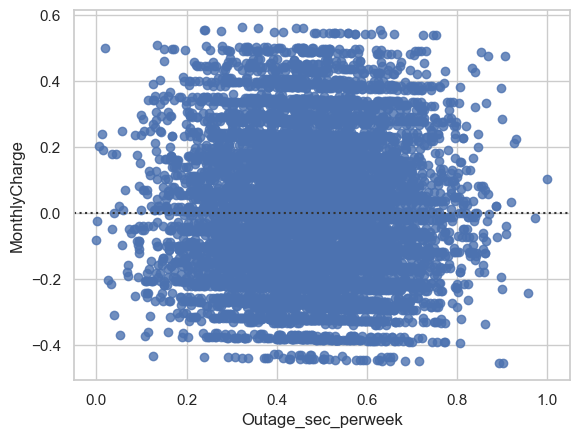

In [37]:
sns.residplot(x='Outage_sec_perweek', y='MonthlyCharge', data=df)
plt.show()

In [41]:
def RSE(y_true, y_predicted):
    """
    - y_true: Actual values
    - y_predicted: Predicted values
    """
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = np.sqrt(RSS / (len(y_true) - 2))
    return rse

print("Residual Standard Error: " + str(RSE(y_test, y_pred)))

Residual Standard Error: 15.594899775314785


## E3. Code

Filename: task1.py

```
import sys

# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import r2_score

def dummify(df, column):
    """
    Takes a dataframe and column to return a dataframe with 
    dummy variables appended.
    """
    dummy = pd.get_dummies(df[column], prefix=column, prefix_sep='_',)
    return pd.concat([df, dummy], axis=1)

def main():
    """Main entry point for the script."""

    # read the csv file
    df = pd.read_csv('churn_clean.csv')

    # fill missing values with None as in no service
    df = df.fillna("None")

    # drop columns
    df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County',
                    'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
                    'Churn', 'Income', 'PaperlessBilling', 'PaymentMethod',
                    'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
                    'Item6', 'Item7', 'Item8'], inplace=True)

    # assemble list of categorical columns to generate dummy variables for
    dummy_columns = ['Marital',
                    'Gender',
                    'Techie',
                    'Contract',
                    'Port_modem',
                    'Tablet',
                    'InternetService',
                    'Phone',
                    'Multiple',
                    'OnlineSecurity',
                    'OnlineBackup',
                    'DeviceProtection',
                    'TechSupport',
                    'StreamingTV',
                    'StreamingMovies'
                    ]

    dummified = df.copy()

    # loop through all the columns tp generate dummy for
    for col in dummy_columns:
        dummified = dummify(dummified, col)


    # drop original columns we generated dummies for
    dummified.drop(columns=dummy_columns, inplace=True)

    # move target variable at the end of the dataframe
    df = dummified[['Children', 'Age', 'Outage_sec_perweek', 'Email', 'Contacts',
        'Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year',
        'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
        'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male',
        'Gender_Nonbinary', 'Techie_No', 'Techie_Yes',
        'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year',
        'Port_modem_No', 'Port_modem_Yes', 'Tablet_No', 'Tablet_Yes',
        'InternetService_DSL', 'InternetService_Fiber Optic',
        'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
        'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
        'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
        'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
        'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
        'StreamingMovies_Yes', 'MonthlyCharge']]

    # replace True with 1's and False with 0's
    df =applyace(True, 1)
    df = df.replace(False, 0)

    scaler = MinMaxScaler()

    # Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
    num_vars = ['Children', 'Age', 'Outage_sec_perweek', 'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year', 'MonthlyCharge']
    df[num_vars] = scaler.fit_transform(df[num_vars])

    # split the dataframe between independent and dependent variables
    X = df.drop('MonthlyCharge',axis= 1)
    y = df[['MonthlyCharge']]

    # split train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=493)

    rfe_columns = ['Gender_Female', 'Gender_Male',
                'Port_modem_No', 'Port_modem_Yes',
                'Tablet_No', 'Tablet_Yes',
        'InternetService_DSL', 'InternetService_Fiber Optic',
        'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
        'Multiple_Yes',
                'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
        'DeviceProtection_Yes',
                'ScreateTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
        'StreamingMovies_Yes'
           add

    # Creating X_test dataframe with RFE-selected variables
    X_train_rfe = X_train[rfe_columns]

    # Addrunonstant variable
    X_train_rfe = sm.add_constant(X_train_rfe)

    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

    print(lm.summary())

    # make predictions.

    X_train_rfe = X_train_rfe.drop(['const'], axis=1)

    # Create X_test_new dataframe by dropping variables from X_test
    X_test_rfe = X_test[X_train_rfe.columns]

    # add a constant variable 
    X_test_rfe = sm.add_constant(X_test_rfe)

    # make predictions
    y_pred = lm.predict(X_test_rfe)

    r2_score(y_true = y_test, y_pred = y_pred)

    print("R2 score: " + str(r2_score(y_true = y_test, y_pred = y_pred)))

if __name__ == '__main__':
    sys.exit(main())t, y_pred = y_pred)

print("R2 score: " + str(r2_score(y_true = y_test, y_pred = y_pred)))

if __name__ == '__main__':
    sys.exit(main())

## F1. Results

Final regression equation: y = 2.50e+10 + -0.006 * Gender_Female + -0.0029 * Gender_Male + 2.58e+10 * Port_modem_No + 2.58e+10 * Port_modem_Yes - 1.61e+10 * Tablet_No - 1.61e+10 * Tablet_Yes - 2.32e+10 * InternetService_DSL - 2.32e+10 * InternetService_Fiber_Optic - 2.32e+10 * InternetService_None - 1.68e+11 * Phone_No - 1.68e+11 * Phone_Yes + 3.39e+10 * Multiple_No + 3.39e+10 * Multiple_Yes + 3.41e+10 * OnlineBackup_No + 3.41e+10 * OnlineBackup_Yes + 2.10e+10 * DeviceProtection_No + 2.10e+10 * DeviceProtection_Yes + 3.51e+10 * StreamingTV_No + 3.51e+10 * StreamingTV_Yes + 3.28e+10 * StreamingMovies_No + 3.28e+10 * StreamingMovies_Yes

The coefficients suggest that for every Gender_Female, MonthlyCharge will decrease by 0.006 and so on and so forth. The p-values indicate that the features are not statistically significant. Even though we have a high R2 score, the p-values and residual plots suggest that our model is biased.

## F2. Recommendations

The result of the analysis is inconclusive and I recommend reviewing the model for any evidence of bias.

## G. Panoptop Demonstration

URL: ___

## H. Sources of Third-Party Code

- 

## I. Sources

In [39]:
##